### Exploratory Data Analysis: vectors dataset

In [39]:
import ast
import datetime as dt
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [5]:
ISW_DATA_PATH='data/4_final_dataset/isw_final'

**Read .csv file and write it to *df_isw* dataframe**

In [93]:
df_isw = pd.read_csv('data/4_final_dataset/isw_final.csv')
df_isw.head(50)

,report_date,title,text_title,main_text,text_stemm,text_lemm,keywords,following_date
0,2022-02-24,Russia-Ukraine Warning Update: Initial Russian...,Russia-Ukraine Warning Update: Initial Russian...,\r\n\r\nRussian President Vladimir Putin beg...,russian presid vladimir putin began larg scal...,russian president vladimir putin began large ...,"{'pm': 0.294, 'airport': 0.27, 'kyiv': 0.247, ...",2022-02-25
1,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"Mason Clark, George Barros, and Kateryna Step...",mason clark georg barro kateryna stepanenko r...,mason clark george barros kateryna stepanenko...,"{'february': 0.341, 'kyiv': 0.326, 'pm': 0.263...",2022-02-26
2,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"Mason Clark, George Barros, and Katya Stepane...",mason clark georg barro katya stepanenko russ...,mason clark george barros katya stepanenko ru...,"{'february': 0.41, 'kyiv': 0.37, 'twenty': 0.2...",2022-02-27
3,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"\r\n\r\nFebruary 27, 4pm EST\r\n\r\nThe Russi...",februari twenti seven 4pm est russian militar...,february twenty seven 4pm est russian militar...,"{'february': 0.51, 'seven': 0.322, 'twenty': 0...",2022-02-28
4,2022-02-28,"Russian Offensive Campaign Assessment, Februar...","Russian Offensive Campaign Assessment, Februar...",\r\n\r\nThe Russian military is reorganizing...,russian militari reorgan militari effort atte...,russian military reorganizing military effort...,"{'february': 0.542, 'twenty': 0.317, 'eight': ...",2022-03-01
5,2022-03-01,"Russian Offensive Campaign Assessment, March 1...","Russian Offensive Campaign Assessment, March 1",\r\n\r\nRussian forces are completing the re...,russian forc complet reinforc resuppli troop ...,russian force completing reinforcement resupp...,"{'kyiv': 0.36, 'chernihiv': 0.219, 'hour': 0.1...",2022-03-02
6,2022-03-02,"Russian Offensive Campaign Assessment, March 2...","Russian Offensive Campaign Assessment, March 2",\r\n\r\nRussian forces resumed offensive ope...,russian forc resum offens oper support envelo...,russian force resumed offensive operation sup...,"{'march': 0.559, 'kyiv': 0.394, 'chernihiv': 0...",2022-03-03
7,2022-03-03,Ukraine Conflict Update 14 | Institute for the...,Ukraine Conflict Update 14,"\r\n\r\nwith the Critical Threats Project, A...",critic threat project aei march two thousand ...,critical threat project aei march two thousan...,"{'march': 0.587, 'foreign': 0.18, 'eu': 0.175,...",2022-03-04
8,2022-03-04,Ukraine Conflict Update 15 | Institute for the...,Ukraine Conflict Update 15,"\r\n\r\nwith the Critical Threats Project, A...",critic threat project aei march two thousand ...,critical threat project aei march two thousan...,"{'march': 0.594, 'nato': 0.159, 'lukashenko': ...",2022-03-05
9,2022-03-05,"Explainer on Russian Conscription, Reserve, an...","Explainer on Russian Conscription, Reserve, an...","\r\n\r\nMarch 5, 2022\r\nThe early announcem...",march two thousand and twenti two earli annou...,march two thousand and twenty two early annou...,"{'reservist': 0.373, 'and': 0.302, 'reserve': ...",2022-03-06


**Select the word from the vector with the largest weight for each day**

**Then we count how often this maximum word occurs in all days of war**

In [77]:
max_values=[]
length=len(df_isw)

for i in range(length):
    temp=df_isw["keywords"][i]
    res = ast.literal_eval(temp)
    max_values.append( max(res, key=res.get))

    
max_values_set=set(max_values)
max_values_dic={}

for i in (max_values_set):
    max_values_dic[i]=[i,max_values.count(i)]
    


**We visualize the received data, that is, the word and the number of days when it had the greatest weight among all the others**

C:\Users\ShevT\AppData\Local\Temp\ipykernel_18704\1930210270.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(words1, value, '-ok', color='purple')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


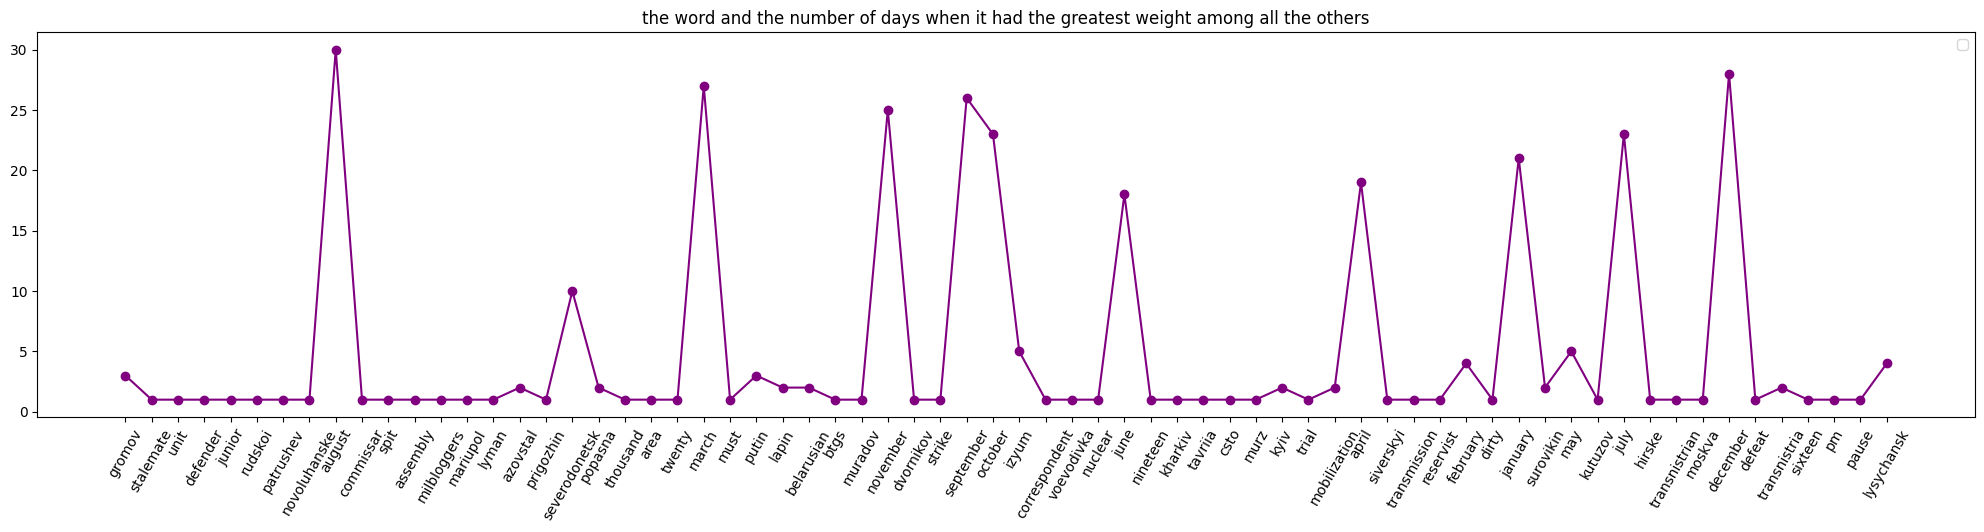

In [92]:
words=pd.DataFrame.from_dict(max_values_dic, orient='index', columns=['words','values'])



words1=list(words["words"])
value=list(words["values"])

plt.figure(figsize = (25,5))

plt.plot(words1, value, '-ok', color='purple')
plt.xticks(rotation = 60)
plt.title("the word and the number of days when it had the greatest weight among all the others")

plt.legend()
plt.show()




**Select top 5 words from the vector with the largest weight for each day (March 2022)**

**Then we count how often this max occurrent word occurs duing March** 

In [117]:
max_values=[]

for j in range(31):
    temp=df_isw["keywords"][j+5]
    res = ast.literal_eval(temp)
    for i in range(5):
        max_values.append( max(res, key=res.get))
        res.pop(max(res, key=res.get), None)
    
#max_values

max_values_set=set(max_values)
max_values_dic={}

for i in (max_values_set):
    max_values_dic[i]=[i,max_values.count(i)]
    
#max_values_dic    

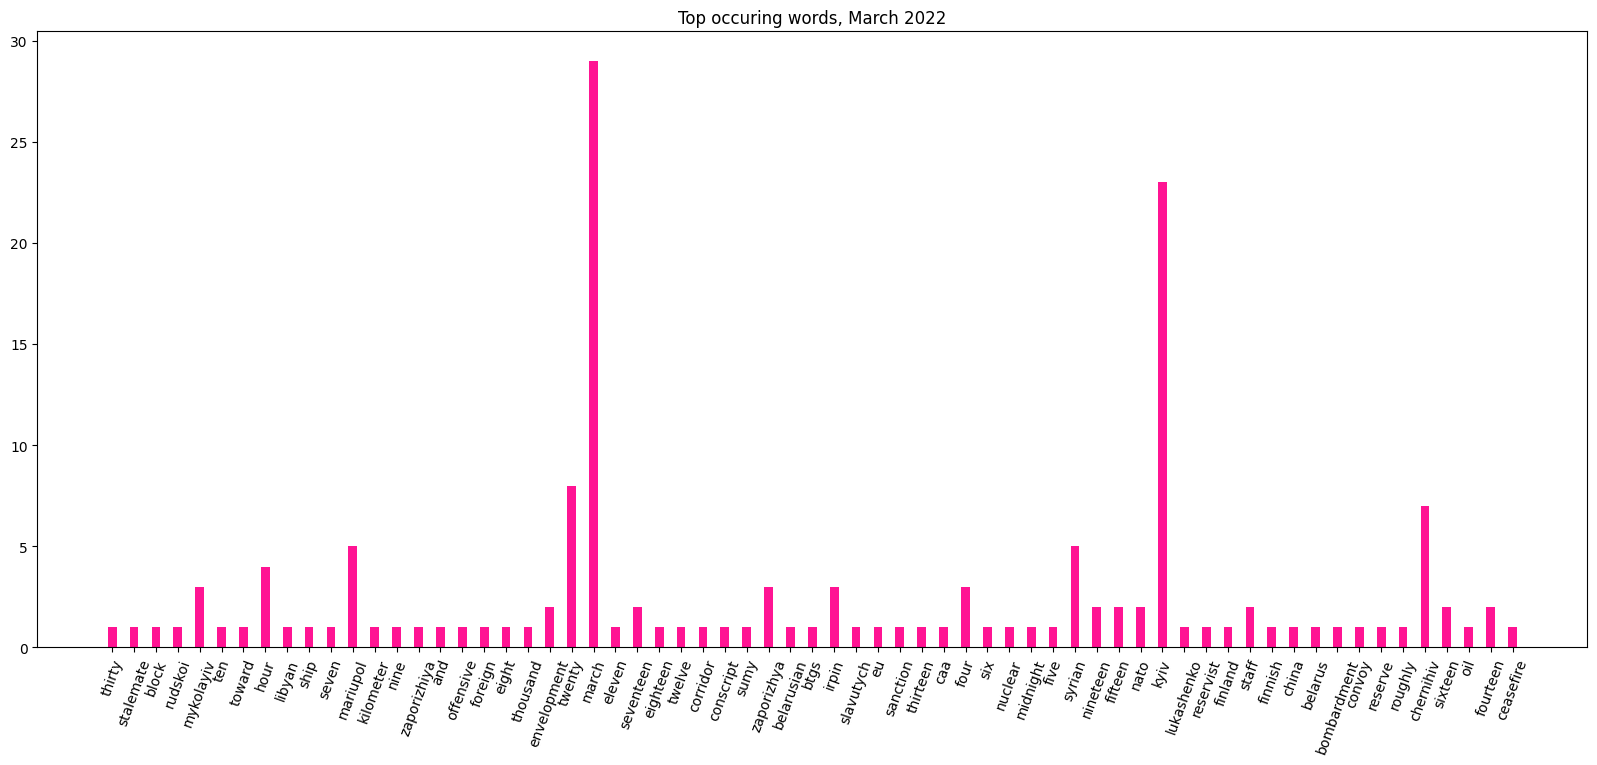

In [134]:
words=pd.DataFrame.from_dict(max_values_dic, orient='index', columns=['words','values'])



words1=list(words["words"])
value=list(words["values"])

fig = plt.figure(figsize = (20, 8))
plt.title("Top occuring words, March 2022")
plt.bar(words1, value, color = '#FF1493', width = 0.4)
plt.xticks(rotation = 70)

plt.show()